# 1.什么是影像组学

影像组学（Radiomics）是一种利用医学影像数据中的大量特征进行定量分析和挖掘的方法。它的目标是通过提取和分析医学影像中的大量图像特征，
以揭示潜在的生物学特征、疾病信息和治疗预测。

# 2. pyradiomics介绍

pyradiomics是一个开源的Python软件包，用于从医学影像中提取Radiomics（放射组学）特征。支持2D和3D特征提取，可用于计算感兴趣区域（基于分割）或生成特征图（基于体素）的单个特征值。同时，还能和D3 slicer结合使用，来进行特征提取。

能支持提取的特征如下：

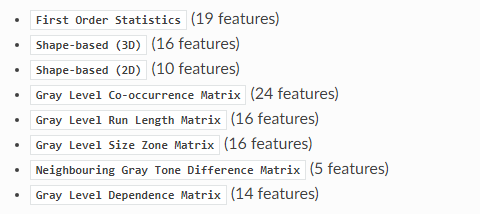

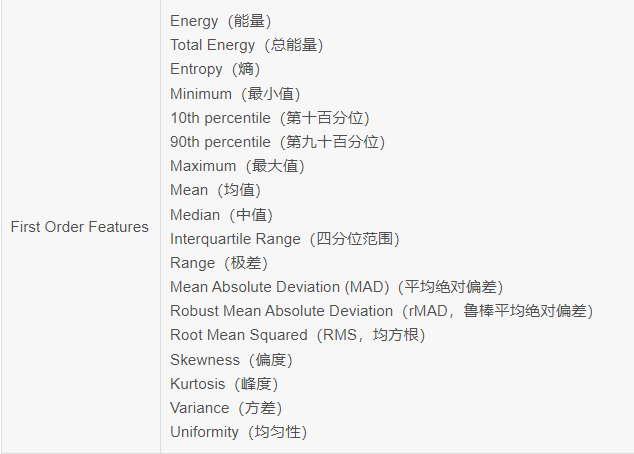

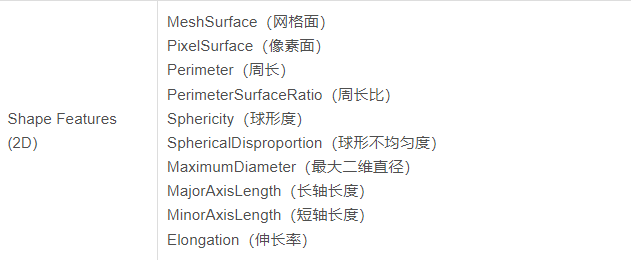

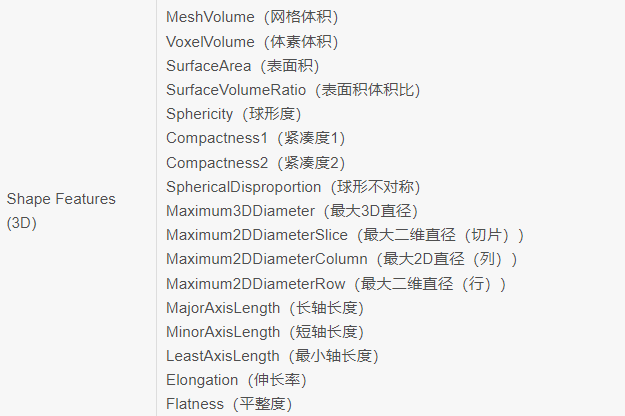

## 2.2 pyradiomics使用步骤

- 1. 准备好数据：比如CT图 MRI图（准备工作 有的时候还会包括ROI标注）
- 2. 搭建好环境：准备好python环境 并安装好pyradiomics包
- 3. 特征提取：利用pyradiomics进行特征提取，这些特征可能包括数学特征、几何特征和统计特征等，也可以选择对感兴趣的区域进行分割，从而提取更精细的特征
- 4. 特征选择和分析：通过合适的方法进行特征选择，通过统计学或者机器学习建模进行分析
- 5. 结果解释和应用：需要根据特征分析的结果，来解释这些特征与疾病之间的关系

In [16]:
#安装pyradiomics包
!pip install pyradiomics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 36.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Discarding https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz (from https://pypi.org/simple/pyradiomics/): Requested pyradiomics from https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz has inconsistent version: expected '3.1.0', but metadata has '3.0.1a1'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 33.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyradiomics: filename=pyradiomics-3.0.1-cp310-cp310-linux_x86_64.whl size=117214 sha256=52b6466231a8708ff7e973313c5cb56e9d26fbf2e41e8ce8abc80094a598ceee
  Stored

# 3. pyradiomics的具体使用

在python中我们通过import radiomics来引入包。如下图所示，pyradiomics所提供的所有模块。其中**featureextractor**是很重要的一个模块，它提供了特征提取的具体模块和方法。

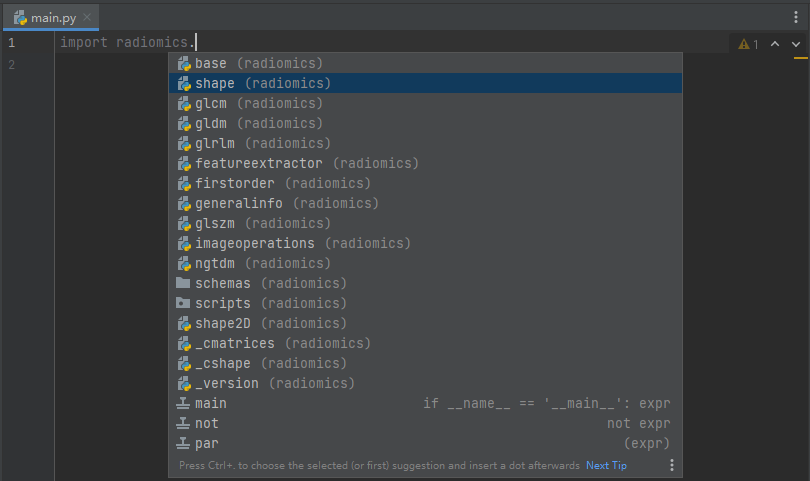

来具体看一下featureextractor这个模块：from radiomics.featureextractor import RadiomicsFeatureExtractor

在featureextractor这个模块下面定义了一个类：RadiomicsFeatureExtractor。这个类是一个计算放射组学特征的包装器。
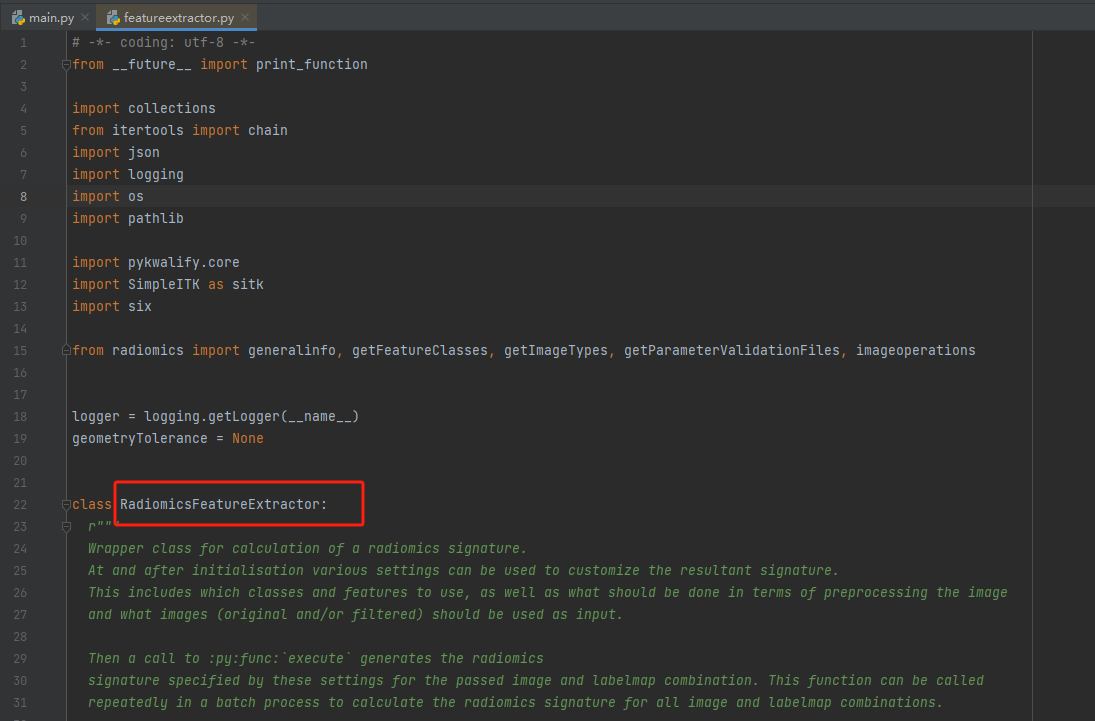

来看一下初始化函数：函数的入口接受*args以及 ***kwargs. 表示可以提供一个参数文件(指向yaml或json结构化文件的字符串)或者字典,其中包含所有必要的设置（包含“setting”，“imageType”和/或“featureClass”）
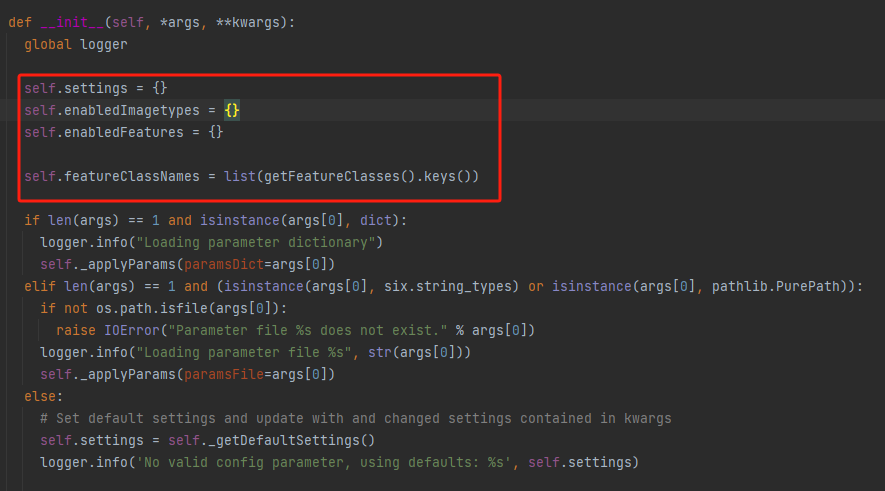

下图是所提供的所有具体的方法，可以看见提供了一个computeFeatures()的方法，就是用于计算和提取特征的，实际使用的时候再来对一些方法做具体的展示和讲解。

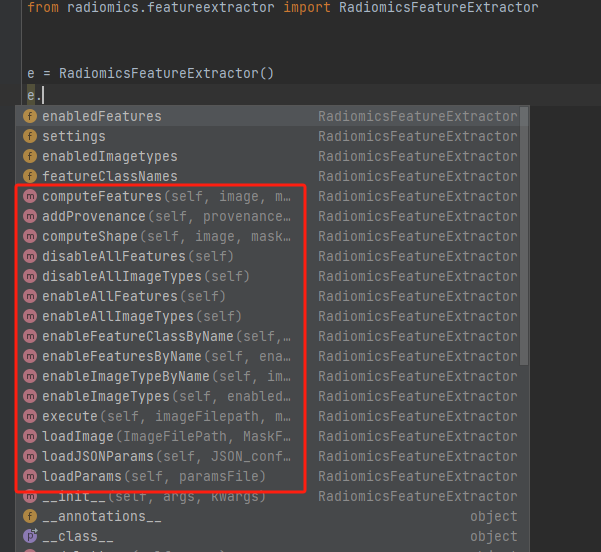

## 3. 1 实战演练一

# 3.1.1 特征提取器的使用

In [7]:
#导入必要的包
import os
import radiomics
import SimpleITK as sitk
import six

from radiomics import featureextractor, getTestCase

In [8]:
#第一步 准备数据
#从pyradiomics中导入自带的测试数据
imagePath, maskPath = radiomics.getTestCase('brain1')

if imagePath is None or maskPath is None:  
    raise Exception('Error getting testcase!') 

paramPath = os.path.join('..', 'examples', 'exampleSettings', 'Params.yaml')  #添加路径
print('Parameter file, absolute path:', os.path.abspath(paramPath))

Parameter file, absolute path: /kaggle/examples/exampleSettings/Params.yaml


In [9]:
#场景一：使用默认配置default 进行特征提取
from radiomics.featureextractor import RadiomicsFeatureExtractor #导入包

extractor1 = RadiomicsFeatureExtractor() #创建特征提取器对象，使用默认配置 
print('Extraction parameters:\n\t', extractor1.settings)  #打印出setting信息
print('Enabled filters:\n\t', extractor1.enabledImagetypes) 
print('Enabled features:\n\t', extractor1.enabledFeatures) #打印出要提取哪些features

Extraction parameters:
	 {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
Enabled filters:
	 {'Original': {}}
Enabled features:
	 {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}


In [10]:
# 场景二：通过字典的方式设置settings
settings = {}
settings['binWidth'] = 20
settings['sigma'] = [1, 2, 3]

extractor2 = featureextractor.RadiomicsFeatureExtractor(**settings) 

print('Extraction parameters:\n\t', extractor2.settings)
print('Enabled filters:\n\t', extractor2.enabledImagetypes)  # 默认配置
print('Enabled features:\n\t', extractor2.enabledFeatures)  # 默认配置

Extraction parameters:
	 {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True, 'binWidth': 20, 'sigma': [1, 2, 3]}
Enabled filters:
	 {'Original': {}}
Enabled features:
	 {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}


In [11]:
# 增加filter（过滤器）
extractor2.enableImageTypeByName('LoG')
print('')
print('Enabled filters:\n\t', extractor2.enabledImagetypes)

# 设置为firstorder
extractor2.disableAllFeatures()
extractor2.enableFeatureClassByName('firstorder')
print('')
print('Enabled features:\n\t', extractor2.enabledFeatures)

# 增加GCLM特征
extractor2.enableFeaturesByName(glcm=['Autocorrelation', 'Homogeneity1', 'SumSquares'])
print('')
print('Enabled features:\n\t', extractor2.enabledFeatures)


Enabled filters:
	 {'Original': {}, 'LoG': {}}

Enabled features:
	 {'firstorder': []}

Enabled features:
	 {'firstorder': [], 'glcm': ['Autocorrelation', 'Homogeneity1', 'SumSquares']}


In [12]:
#场景三：从配置文件中读取配置信息 进行特征提取

from radiomics.featureextractor import RadiomicsFeatureExtractor #导入包

#创建一个特征抽取器对象，并使用指定的参数文件进行初始化
extractor3 = RadiomicsFeatureExtractor(parameter_file = paramPath) #创建特征提取的对象，并传入配置文件
print('Extraction parameters:\n\t', extractor3.settings)
print('Enabled filters:\n\t', extractor3.enabledImagetypes)
print('Enabled features:\n\t', extractor3.enabledFeatures)


Extraction parameters:
	 {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True, 'parameter_file': '../examples/exampleSettings/Params.yaml'}
Enabled filters:
	 {'Original': {}}
Enabled features:
	 {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}


## 3.1.2 提取特征

In [13]:
result = extractor3.execute(imagePath, maskPath)  #通过调用execute方法 来对数据进行特征提取 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


In [14]:
#打印结果信息
print('Result type:', type(result))  # 可以看见返回的值是字典类型
print('')
print('Calculated features')
for key, value in six.iteritems(result): #遍历字典信息
    print('\t', key, ':', value)

Result type: <class 'collections.OrderedDict'>

Calculated features
	 diagnostics_Versions_PyRadiomics : v3.0.1
	 diagnostics_Versions_Numpy : 1.26.3
	 diagnostics_Versions_SimpleITK : 2.3.1
	 diagnostics_Versions_PyWavelet : 1.5.0
	 diagnostics_Versions_Python : 3.10.13
	 diagnostics_Configuration_Settings : {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True, 'parameter_file': '../examples/exampleSettings/Params.yaml'}
	 diagnostics_Configuration_EnabledImageTypes : {'Original': {}}
	 diagnostics_Image-original_Hash : 5c9ce3ca174f0f8324aa4d277e0fef82dc5ac566
	 diagnostics_Image-original_Dimensionality : 3D
	 diagnostics_Image-original_Spacing : (0.7812499999999999, 0.7812499999999999, 6.499999999999998)
	 di

# 3.2实战演练二

In [15]:
from radiomics.featureextractor import RadiomicsFeatureExtractor
import six, numpy as np

In [16]:
#第一步：准备数据
import os
import SimpleITK as sitk

from radiomics import getTestCase

imagepath_1, labelpath_1 = getTestCase('brain1')
imagepath_2, labelpath_2 = getTestCase('brain2')
print(imagepath_1)

image_1 = sitk.ReadImage(imagepath_1)
label_1 = sitk.ReadImage(labelpath_1)
image_2 = sitk.ReadImage(imagepath_2)
label_2 = sitk.ReadImage(labelpath_2)

/tmp/pyradiomics/data/brain1_image.nrrd


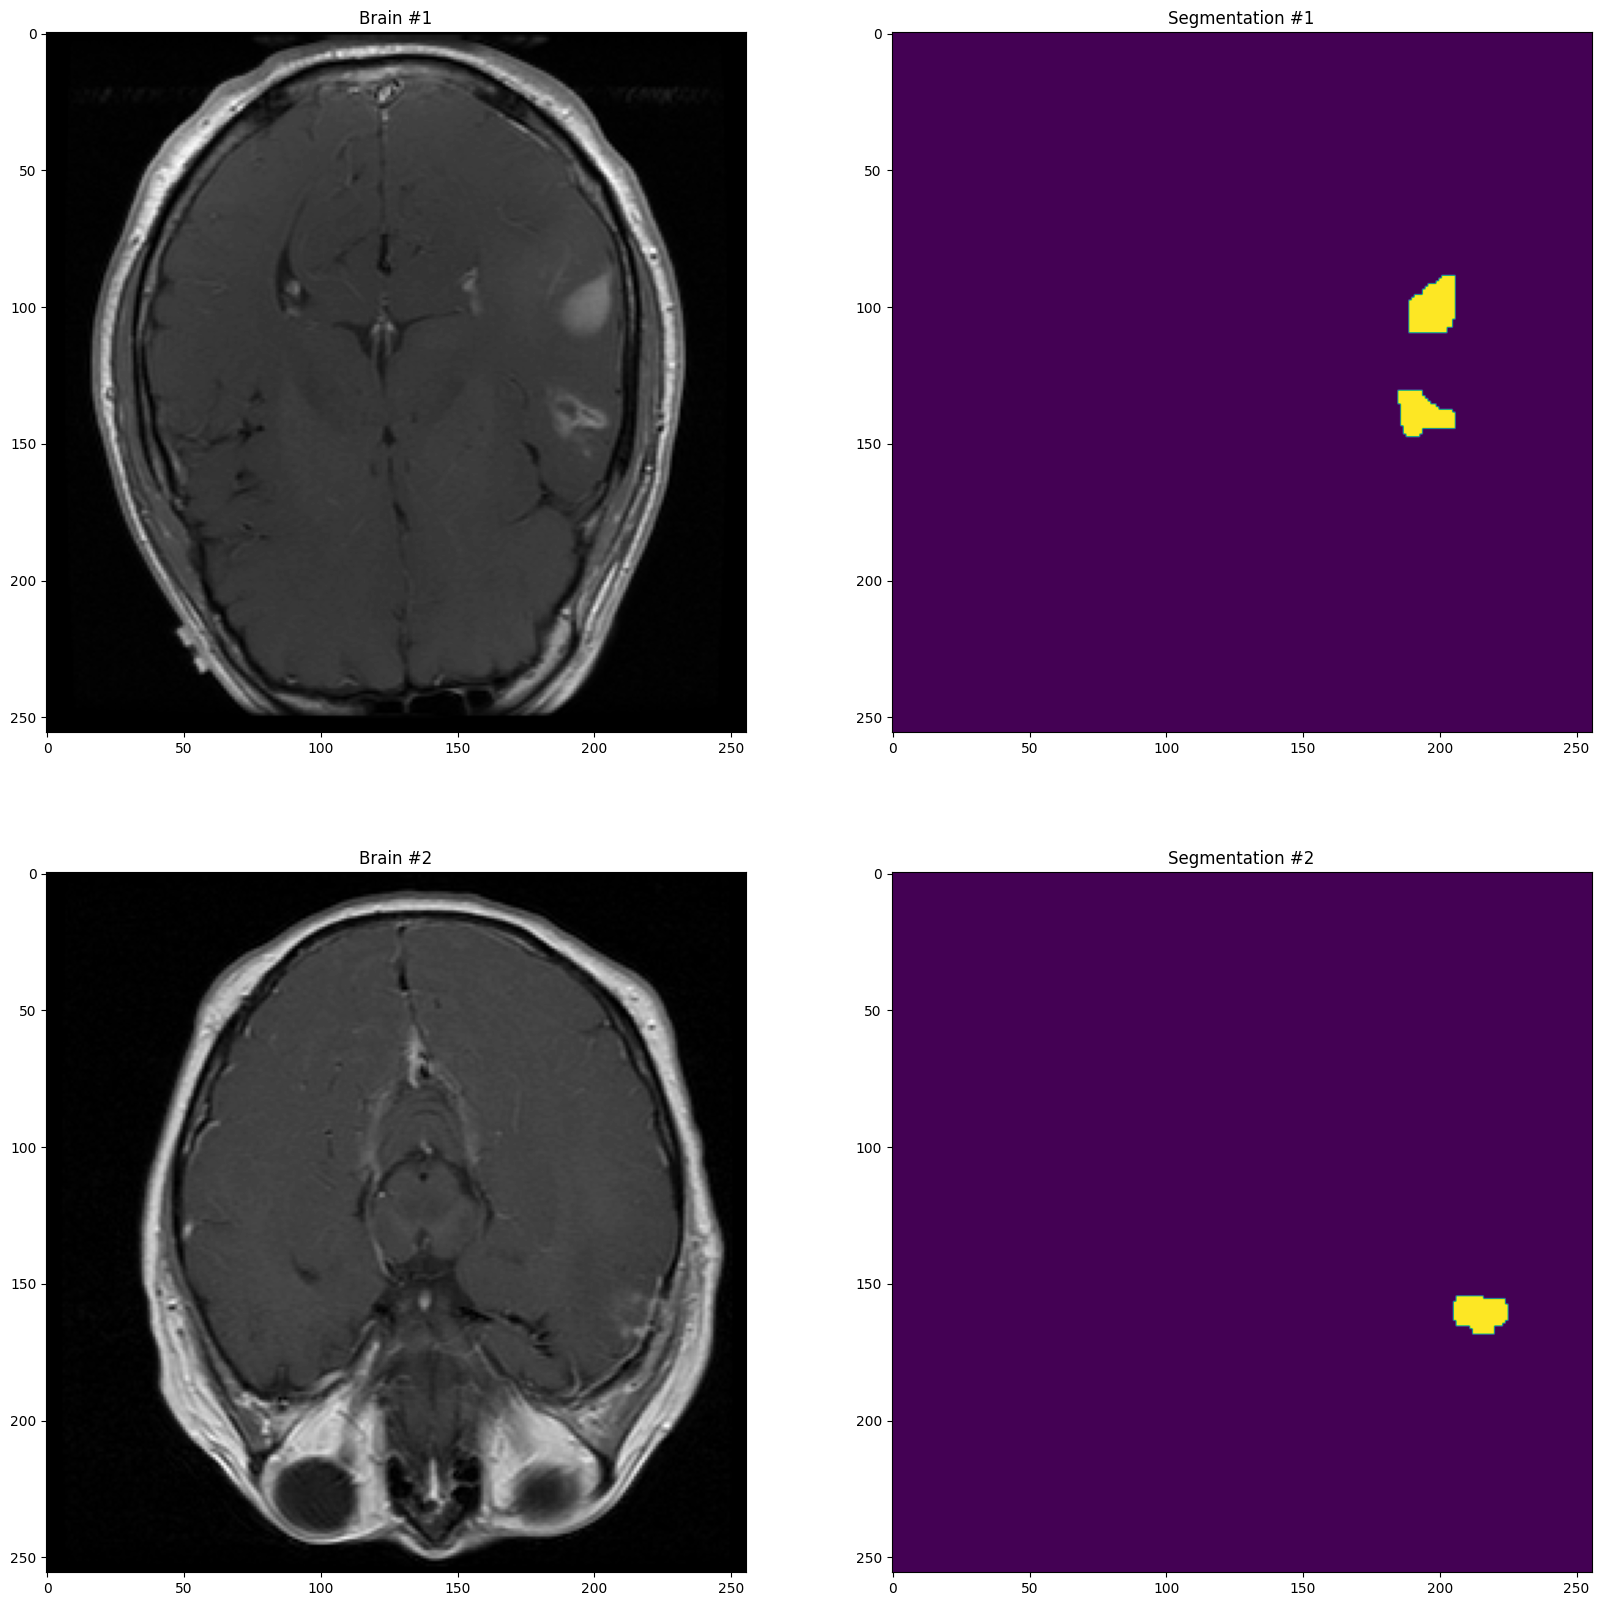

In [17]:
#对图片数据进行可视化
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
# First image
plt.subplot(2,2,1)
plt.imshow(sitk.GetArrayFromImage(image_1)[12,:,:], cmap="gray")
plt.title("Brain #1")
plt.subplot(2,2,2)
plt.imshow(sitk.GetArrayFromImage(label_1)[12,:,:])        
plt.title("Segmentation #1")

# Second image
plt.subplot(2,2,3)
plt.imshow(sitk.GetArrayFromImage(image_2)[8,:,:], cmap="gray")        
plt.title("Brain #2")

plt.subplot(2,2,4)
plt.imshow(sitk.GetArrayFromImage(label_2)[8,:,:])        
plt.title("Segmentation #2")

plt.show()

In [18]:
!ls /kaggle/input/parameter  #yml文件的路径

Params.yaml


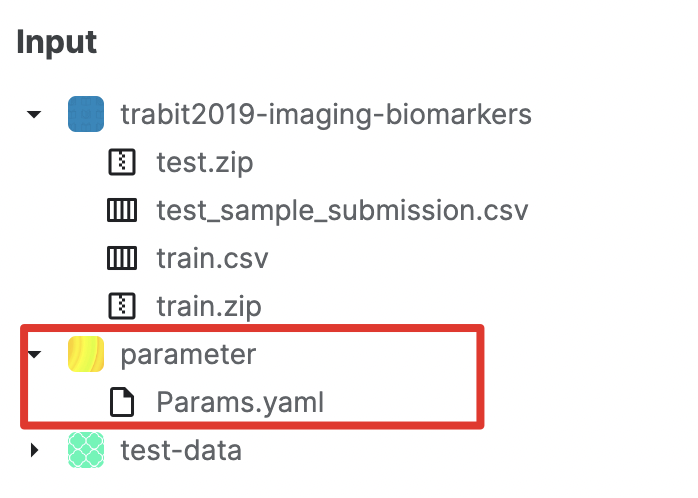

In [19]:
#提取特征
paramPath = "/kaggle/input/parameter/Params.yaml"

extractor = RadiomicsFeatureExtractor(paramPath)
result_1 = extractor.execute(image_1, label_1)
result_2 = extractor.execute(image_2, label_2)

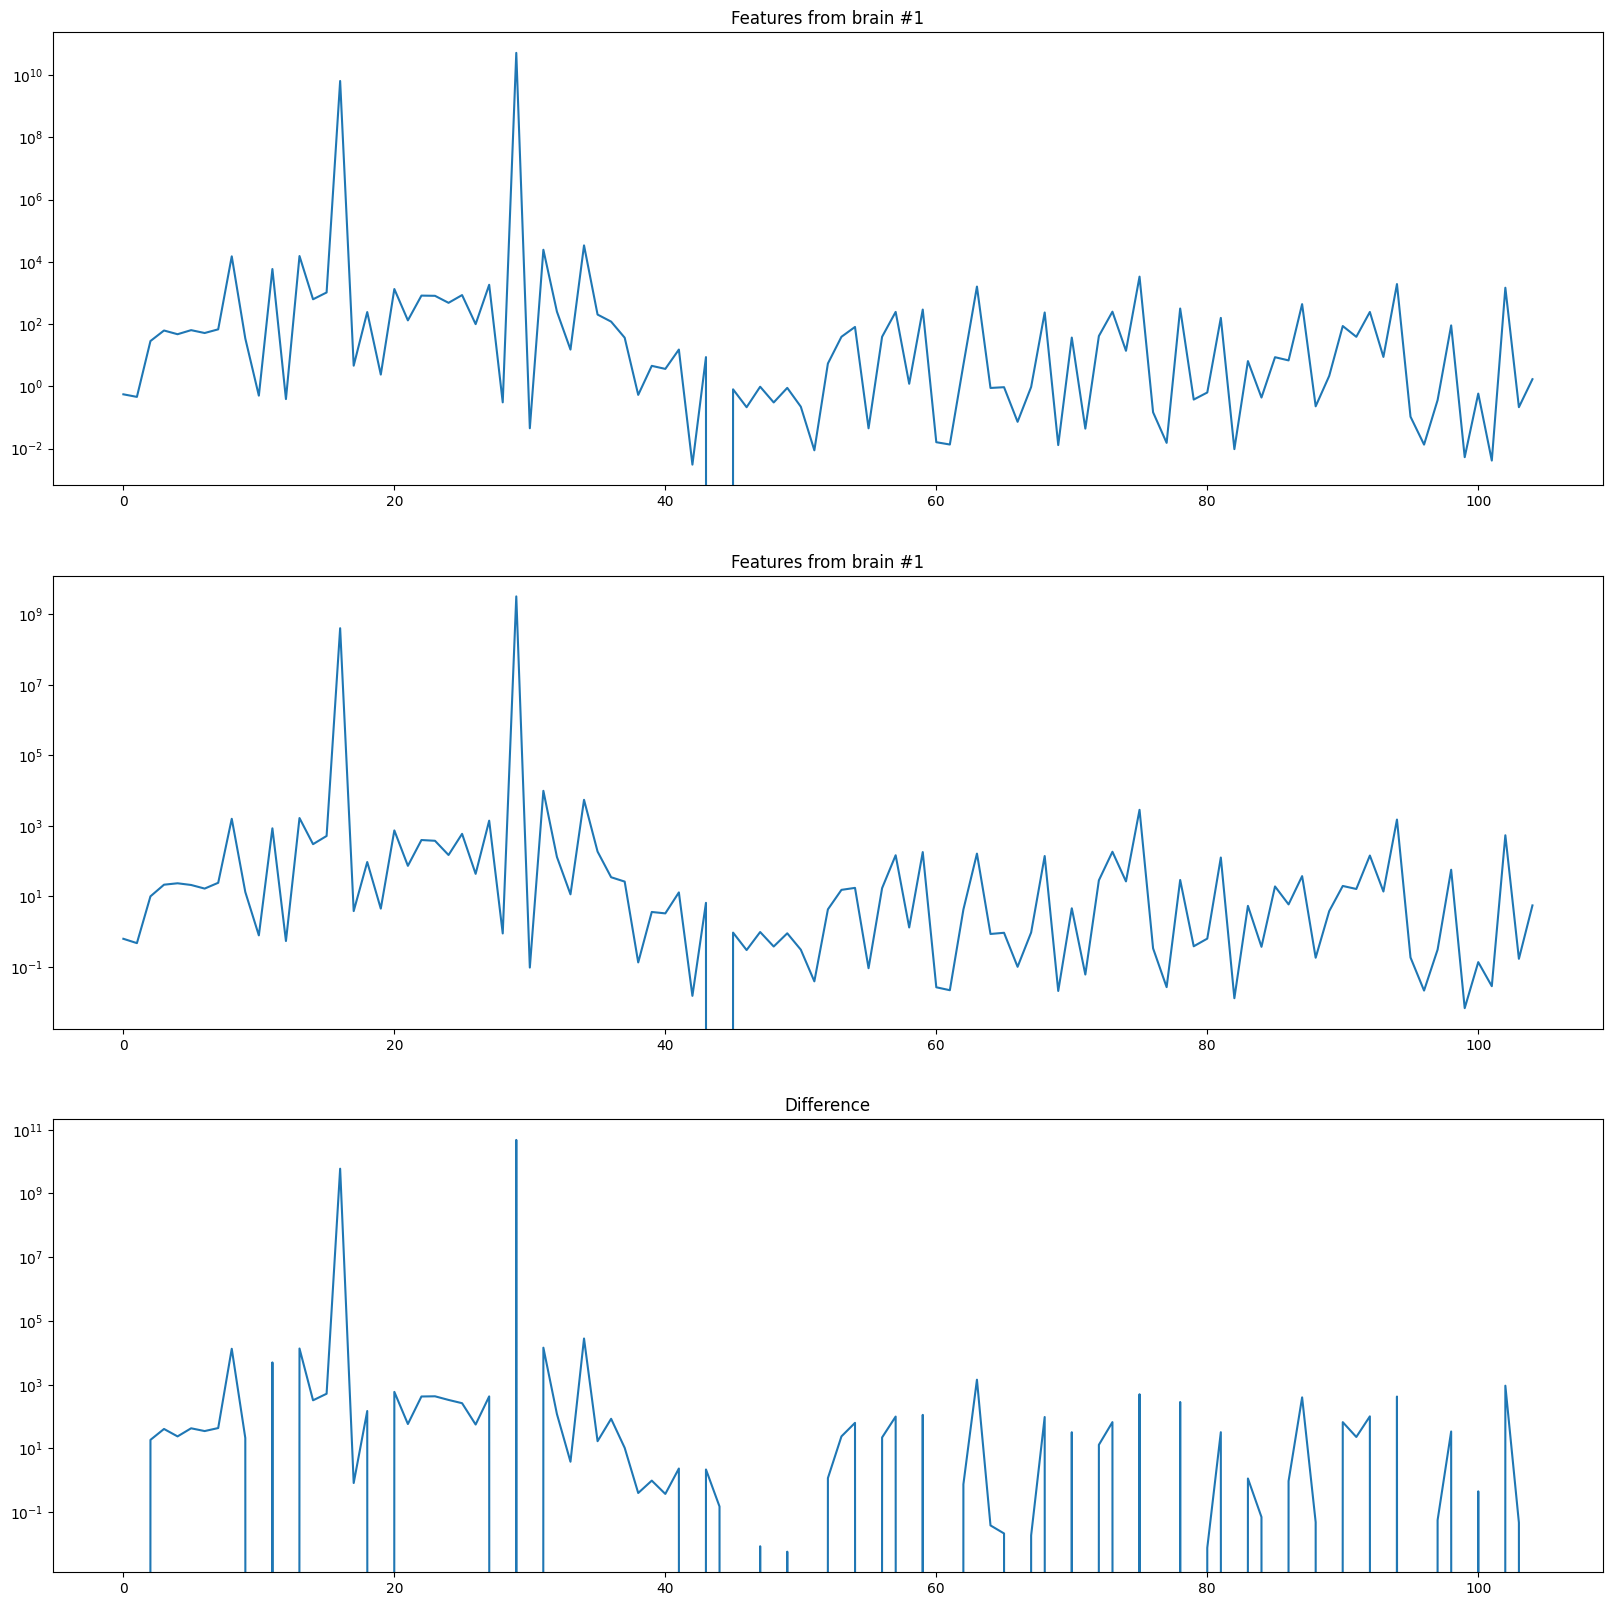

In [20]:
# 可视化
feature_1 = np.array([])
feature_2 = np.array([])

for key, value in six.iteritems(result_1):
    if key.startswith("original_"):
        feature_1 = np.append ( feature_1, result_1[key])
        feature_2 = np.append ( feature_2, result_2[key])
        
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
plt.plot(feature_1)
plt.yscale('log')
plt.title ( "Features from brain #1")
        
plt.subplot(3,1,2)
plt.plot(feature_2)
plt.yscale('log')
plt.title ( "Features from brain #1")

plt.subplot(3,1,3)
plt.plot(feature_1 - feature_2)
plt.yscale('log')
plt.title ( "Difference")
plt.show()

# 实战演练3

准备数据集：

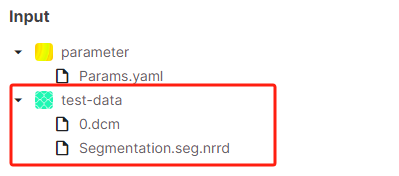

In [21]:
!ls /kaggle/input/test-data

0.dcm  Segmentation.seg.nrrd


Text(0.5, 1.0, 'Segmentation')

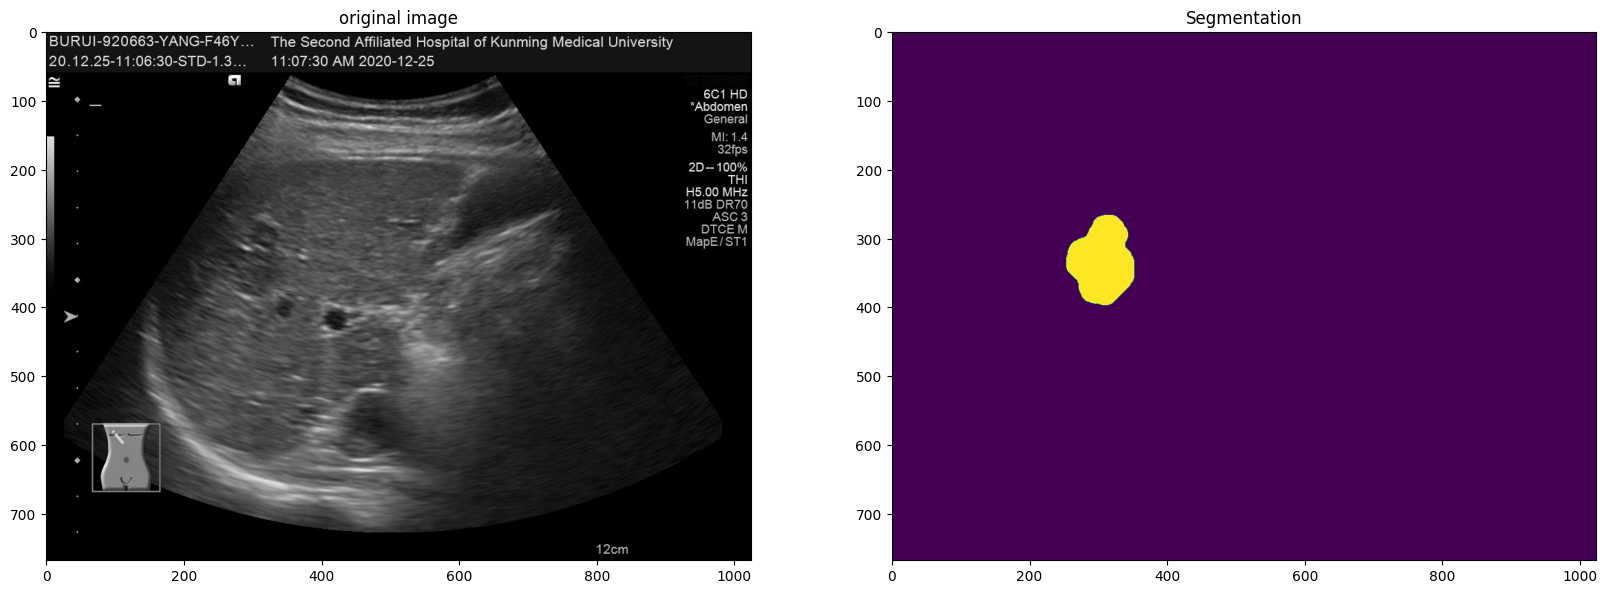

In [22]:
image_path = "/kaggle/input/test-data/0.dcm"
label_path = "/kaggle/input/test-data/Segmentation.seg.nrrd"

image = sitk.ReadImage(image_path)
label = sitk.ReadImage(label_path)


#对图片数据进行可视化
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(sitk.GetArrayFromImage(image)[0,:,:], cmap="gray")
plt.title("original image")
plt.subplot(2,2,2)
plt.imshow(sitk.GetArrayFromImage(label)[0,:,:])        
plt.title("Segmentation")

In [23]:
import SimpleITK as sitk
from radiomics import featureextractor

paramPath = "/kaggle/input/parameter/Params.yaml"
extractor = featureextractor.RadiomicsFeatureExtractor(paramPath)

features = {}

for case_id in range(1,11):
    image = sitk.ReadImage(image_path)
    mask = sitk.ReadImage(label_path)
    
    features[case_id] = extractor.execute (image, mask)
    
feature_names = list(sorted(filter ( lambda k: k.startswith("original_"), features[1] )))

Image too small to apply LoG filter, size: [71 87  1]
Image too small to apply LoG filter, size: [71 87  1]
Image too small to apply LoG filter, size: [71 87  1]
Image too small to apply LoG filter, size: [71 87  1]
Image too small to apply LoG filter, size: [71 87  1]
Image too small to apply LoG filter, size: [71 87  1]
Image too small to apply LoG filter, size: [71 87  1]
Image too small to apply LoG filter, size: [71 87  1]
Image too small to apply LoG filter, size: [71 87  1]
Image too small to apply LoG filter, size: [71 87  1]


In [24]:
# print(features)

In [25]:
print(feature_names)

['original_firstorder_10Percentile', 'original_firstorder_90Percentile', 'original_firstorder_Energy', 'original_firstorder_Entropy', 'original_firstorder_InterquartileRange', 'original_firstorder_Kurtosis', 'original_firstorder_Maximum', 'original_firstorder_Mean', 'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Median', 'original_firstorder_Minimum', 'original_firstorder_Range', 'original_firstorder_RobustMeanAbsoluteDeviation', 'original_firstorder_RootMeanSquared', 'original_firstorder_Skewness', 'original_firstorder_TotalEnergy', 'original_firstorder_Uniformity', 'original_firstorder_Variance', 'original_glcm_Autocorrelation', 'original_glcm_ClusterProminence', 'original_glcm_ClusterShade', 'original_glcm_ClusterTendency', 'original_glcm_Contrast', 'original_glcm_Correlation', 'original_glcm_DifferenceAverage', 'original_glcm_DifferenceEntropy', 'original_glcm_DifferenceVariance', 'original_glcm_Id', 'original_glcm_Idm', 'original_glcm_Idmn', 'original_glcm_Idn',

## 实战三

In [11]:
#数据准备阶段 解压压缩包
!pwd
!unzip /kaggle/input/trabit2019-imaging-biomarkers/train.zip

/kaggle/working
Archive:  /kaggle/input/trabit2019-imaging-biomarkers/train.zip
  inflating: mri_00004519.nii        
 extracting: mri_00004519.h5         
  inflating: mri_00014004.nii        
 extracting: mri_00014004.h5         
  inflating: mri_00031532.nii        
 extracting: mri_00031532.h5         
  inflating: mri_00051473.nii        
 extracting: mri_00051473.h5         
  inflating: mri_00060925.nii        
 extracting: mri_00060925.h5         
  inflating: mri_00069265.nii        
 extracting: mri_00069265.h5         
  inflating: mri_00086578.nii        
 extracting: mri_00086578.h5         
  inflating: mri_00099096.nii        
 extracting: mri_00099096.h5         
  inflating: mri_00104899.nii        
 extracting: mri_00104899.h5         
  inflating: mri_00156141.nii        
 extracting: mri_00156141.h5         
  inflating: mri_00176703.nii        
 extracting: mri_00176703.h5         
  inflating: mri_00177796.nii        
 extracting: mri_00177796.h5         
  inflat

In [14]:
!ls -lh /kaggle/working/  #解压之后输出到/kaggle/working目录下了

total 1.1G
-rw-r--r-- 1 root root 2.6M Jun 21  2019 mri_00004519.h5
-rw-r--r-- 1 root root  13M Sep 12  2016 mri_00004519.nii
-rw-r--r-- 1 root root 2.6M Jun 21  2019 mri_00014004.h5
-rw-r--r-- 1 root root  13M Sep 12  2016 mri_00014004.nii
-rw-r--r-- 1 root root 2.6M Jun 21  2019 mri_00031532.h5
-rw-r--r-- 1 root root  13M Sep 12  2016 mri_00031532.nii
-rw-r--r-- 1 root root 2.6M Jun 21  2019 mri_00051473.h5
-rw-r--r-- 1 root root  13M Sep 12  2016 mri_00051473.nii
-rw-r--r-- 1 root root 2.6M Jun 21  2019 mri_00060925.h5
-rw-r--r-- 1 root root  13M Sep 12  2016 mri_00060925.nii
-rw-r--r-- 1 root root 2.6M Jun 21  2019 mri_00069265.h5
-rw-r--r-- 1 root root  13M Sep 12  2016 mri_00069265.nii
-rw-r--r-- 1 root root 2.6M Jun 21  2019 mri_00086578.h5
-rw-r--r-- 1 root root  13M Sep 12  2016 mri_00086578.nii
-rw-r--r-- 1 root root 2.6M Jun 21  2019 mri_00099096.h5
-rw-r--r-- 1 root root  13M Sep 12  2016 mri_00099096.nii
-rw-r--r-- 1 root root 2.6M Jun 21  2019 mri_00104899.h5
-rw-r--r-- 1

In [18]:
#导入必要的包
from SimpleITK import GetImageFromArray
import radiomics
from radiomics.featureextractor import RadiomicsFeatureExtractor # This module is used for interaction with pyradiomic
import logging
logging.getLogger('radiomics').setLevel(logging.CRITICAL + 1)  # this tool makes a whole TON of log noise

import numpy as np 
import pandas as pd 
import h5py 
import skimage 
import sklearn
import os 
from pathlib import Path 

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#画图设置
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.dpi"] = 125
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.style.use('ggplot')
sns.set_style("whitegrid", {'axes.grid': False})

In [20]:
#创建特征提取器
texture_extractor = RadiomicsFeatureExtractor(verbose=False)
texture_extractor.disableAllFeatures()
_text_feat = {ckey: [] for ckey in texture_extractor.featureClassNames}
texture_extractor.enableFeaturesByName(**_text_feat)

print('Extraction parameters:\n\t', texture_extractor.settings)
print('Enabled filters:\n\t', texture_extractor.enabledImagetypes) 
print('Enabled features:\n\t', texture_extractor.enabledFeatures) 

Extraction parameters:
	 {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True, 'verbose': False}
Enabled filters:
	 {'Original': {}}
Enabled features:
	 {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': [], 'shape2D': []}


In [54]:
import pandas as pd  
from pathlib import Path  
  
!pwd  #查看当前的工作目录  
  
data_root = Path('/kaggle/working')   #/ 'working'  
print(data_root)  
#print(list(data_root.glob('*.h5')))  
  
all_df = pd.DataFrame({'h5_path': list(data_root.glob('*.h5'))})# 读取数据路径信息，存到h5_path列

all_df['file_id'] = all_df['h5_path'].map(lambda x: x.stem) #提取file_id信息
all_df['training_group'] = all_df['h5_path'].map(lambda x: x.parent.stem)
all_df['scan_id'] = all_df['file_id'].map(lambda x: int(x.split('_')[-1])) #提取id信息
print(all_df) #至此数据的路径已经准备好了

/kaggle/working
/kaggle/working
                            h5_path       file_id training_group  scan_id
0   /kaggle/working/mri_00308293.h5  mri_00308293        working   308293
1   /kaggle/working/mri_00412494.h5  mri_00412494        working   412494
2   /kaggle/working/mri_00629033.h5  mri_00629033        working   629033
3   /kaggle/working/mri_00271234.h5  mri_00271234        working   271234
4   /kaggle/working/mri_00855385.h5  mri_00855385        working   855385
..                              ...           ...            ...      ...
65  /kaggle/working/mri_00955450.h5  mri_00955450        working   955450
66  /kaggle/working/mri_00031532.h5  mri_00031532        working    31532
67  /kaggle/working/mri_00945813.h5  mri_00945813        working   945813
68  /kaggle/working/mri_00496219.h5  mri_00496219        working   496219
69  /kaggle/working/mri_00758451.h5  mri_00758451        working   758451

[70 rows x 4 columns]


In [37]:
def read_scan(full_scan_path):
    # 使用hdf5读取数据
    with h5py.File(full_scan_path, 'r') as h:
        return h['image'][:][:, :, :, 0] #从文件中获取数据

In [46]:
sample_scan = all_df.iloc[30] #取出第三行的数据 通过iloc进行索引
print(sample_scan)

image_data = read_scan(sample_scan['h5_path'])
print('Image Shape:', image_data.shape)

h5_path           /kaggle/working/mri_00104899.h5
file_id                              mri_00104899
training_group                            working
scan_id                                    104899
Name: 30, dtype: object
Image Shape: (176, 208, 176)


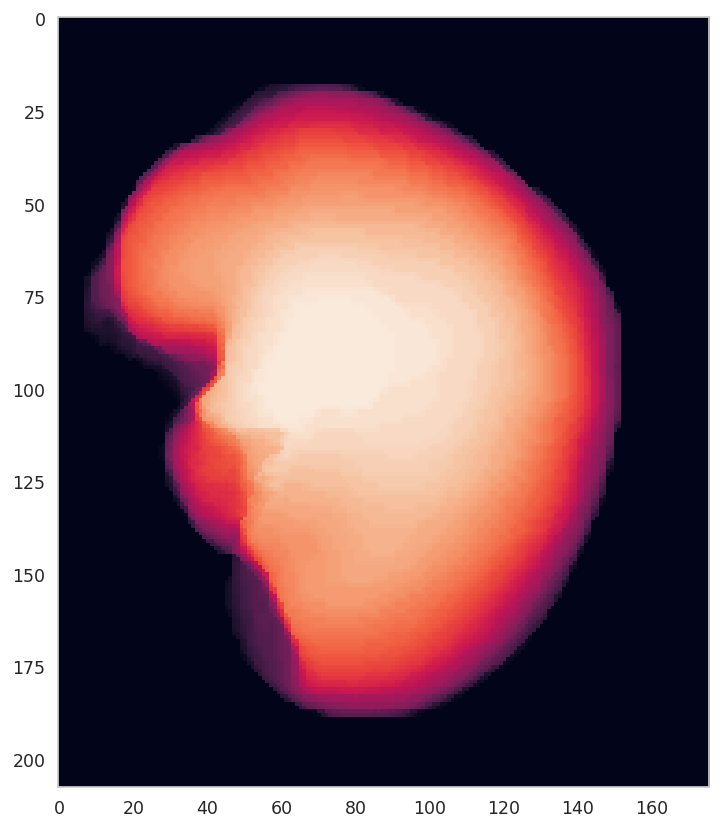

In [47]:
plt.imshow(np.sum((image_data>0).astype(float), 0)) #图像可视化

In [48]:
#对单张图片进行特征提取
results = texture_extractor.execute(GetImageFromArray(image_data),
                            GetImageFromArray((image_data>0).astype(np.uint8)))  

In [49]:
pd.DataFrame([results]).T  #对结果进行转置

,0
diagnostics_Versions_PyRadiomics,v3.0.1
diagnostics_Versions_Numpy,1.26.3
diagnostics_Versions_SimpleITK,2.3.1
diagnostics_Versions_PyWavelet,1.5.0
diagnostics_Versions_Python,3.10.13
...,...
original_ngtdm_Busyness,13.140235346258532
original_ngtdm_Coarseness,1.4552922304808754e-05
original_ngtdm_Complexity,12940.249676191186
original_ngtdm_Contrast,0.054451975406922405


In [50]:
def calc_radiomics(in_image_data):
    return texture_extractor.execute(GetImageFromArray(in_image_data),
                            GetImageFromArray((in_image_data>0).astype(np.uint8)))

In [52]:
#对每一张图片利用pyradiomics进行特征提取 并将结果存入dataframe中。
#由于数量比较多 需要运行较长时间 耐心等候----或者换强点的配置，我当时运行了差不多50几分钟。
#大家可以就选几张图片 做运行测试。。。。。慎重运行所有图片数据
all_df['radiomics'] = all_df['h5_path'].map(lambda c_filename: calc_radiomics(read_scan(c_filename)))

In [58]:
#all_df取出前5张图片
temp_all_df = all_df.head(5).copy()  #这里一定要加copy 不然下面代码执行会报错
temp_all_df['radiomics'] = temp_all_df['h5_path'].map(lambda c_filename: calc_radiomics(read_scan(c_filename)))

In [59]:
temp_all_df   #增加了一列radiomics

,h5_path,file_id,training_group,scan_id,radiomics
0,/kaggle/working/mri_00308293.h5,mri_00308293,working,308293,"{'diagnostics_Versions_PyRadiomics': 'v3.0.1',..."
1,/kaggle/working/mri_00412494.h5,mri_00412494,working,412494,"{'diagnostics_Versions_PyRadiomics': 'v3.0.1',..."
2,/kaggle/working/mri_00629033.h5,mri_00629033,working,629033,"{'diagnostics_Versions_PyRadiomics': 'v3.0.1',..."
3,/kaggle/working/mri_00271234.h5,mri_00271234,working,271234,"{'diagnostics_Versions_PyRadiomics': 'v3.0.1',..."
4,/kaggle/working/mri_00855385.h5,mri_00855385,working,855385,"{'diagnostics_Versions_PyRadiomics': 'v3.0.1',..."


In [61]:
full_df = pd.DataFrame([dict(**c_row.pop('radiomics'), **c_row) for _, c_row in temp_all_df.iterrows()])
print(full_df.shape, 'data prepared')
first_cols = temp_all_df.columns[:-1].tolist()
full_df = full_df[first_cols + [c_col for c_col in full_df.columns 
                                if c_col not in first_cols]]


full_df.to_csv('all_radiomics_table.csv', index=False)  #将提取到的特征写入csv文件中里去
full_df.sample(3)

(5, 133) data prepared


,h5_path,file_id,training_group,scan_id,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,/kaggle/working/mri_00308293.h5,mri_00308293,working,308293,v3.0.1,1.26.3,2.3.1,1.5.0,3.10.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...",...,720.7888208433192,0.0011708764755603957,7.805129598210576,0.28134776496103797,10888.544379644773,11.50247973718919,1.1851698353833941e-05,26920.355452964457,0.033221846314489906,0.25426119859548096
3,/kaggle/working/mri_00271234.h5,mri_00271234,working,271234,v3.0.1,1.26.3,2.3.1,1.5.0,3.10.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...",...,601.5914496669803,0.0020456624244899265,7.899403508494994,0.277178059383517,9806.940791428613,12.922691134226584,1.7247410669038204e-05,11057.482530531384,0.07044910325104636,0.1089059577490994
2,/kaggle/working/mri_00629033.h5,mri_00629033,working,629033,v3.0.1,1.26.3,2.3.1,1.5.0,3.10.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...",...,618.9885302101676,0.001804792061098537,7.831927882428599,0.3138015335303827,2721.335613899885,16.29110931137897,1.5252055180424692e-05,10890.616033640072,0.08736271577116607,0.07830970548899736


In [62]:
full_df

,h5_path,file_id,training_group,scan_id,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,/kaggle/working/mri_00308293.h5,mri_00308293,working,308293,v3.0.1,1.26.3,2.3.1,1.5.0,3.10.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...",...,720.7888208433192,0.0011708764755603957,7.805129598210576,0.28134776496103797,10888.544379644773,11.50247973718919,1.1851698353833941e-05,26920.355452964457,0.033221846314489906,0.25426119859548096
1,/kaggle/working/mri_00412494.h5,mri_00412494,working,412494,v3.0.1,1.26.3,2.3.1,1.5.0,3.10.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...",...,644.1192977965247,0.0013803624047345462,7.791986952273523,0.25956237284557215,16345.677336496037,16.334456720563473,1.3447842939172475e-05,10479.225112790149,0.05451130056896975,0.08600252824177886
2,/kaggle/working/mri_00629033.h5,mri_00629033,working,629033,v3.0.1,1.26.3,2.3.1,1.5.0,3.10.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...",...,618.9885302101676,0.001804792061098537,7.831927882428599,0.3138015335303827,2721.335613899885,16.29110931137897,1.5252055180424692e-05,10890.616033640072,0.08736271577116607,0.07830970548899736
3,/kaggle/working/mri_00271234.h5,mri_00271234,working,271234,v3.0.1,1.26.3,2.3.1,1.5.0,3.10.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...",...,601.5914496669803,0.0020456624244899265,7.899403508494994,0.277178059383517,9806.940791428613,12.922691134226584,1.7247410669038204e-05,11057.482530531384,0.07044910325104636,0.1089059577490994
4,/kaggle/working/mri_00855385.h5,mri_00855385,working,855385,v3.0.1,1.26.3,2.3.1,1.5.0,3.10.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...",...,659.507973023751,0.001378794563034408,7.834921200776827,0.27554664408276075,13889.543116220804,15.360753863577685,1.3673679933120667e-05,12123.683875791072,0.05901036692346879,0.09931941317227468


In [63]:
#专注roi区域
value_feature_names = [c_col for c_col in full_df.columns if (c_col.startswith('original') and '_shape_' not in c_col)]
print(np.random.choice(value_feature_names, 3), 'of', len(value_feature_names))

['original_glszm_LargeAreaHighGrayLevelEmphasis'
 'original_glszm_HighGrayLevelZoneEmphasis'
 'original_glrlm_LongRunHighGrayLevelEmphasis'] of 93


In [64]:

clean_df = full_df[first_cols + value_feature_names].copy()
clean_df.columns = first_cols + [
    ' '.join(c_col.split('original_')[-1].split('_')) 
    for c_col in value_feature_names
]
clean_col_names = clean_df.columns[len(first_cols):]
# fix some of the artifacts from the radiomics tool
obj_cols = clean_df[clean_col_names].select_dtypes(['object']).columns.tolist()
for c_col in obj_cols:
    clean_df[c_col] = clean_df[c_col].map(lambda x: float(x))
clean_df.to_csv('clean_radiomics_table.csv', index=False)
clean_df.sample(3)

,h5_path,file_id,training_group,scan_id,firstorder 10Percentile,firstorder 90Percentile,firstorder Energy,firstorder Entropy,firstorder InterquartileRange,firstorder Kurtosis,...,glszm SmallAreaHighGrayLevelEmphasis,glszm SmallAreaLowGrayLevelEmphasis,glszm ZoneEntropy,glszm ZonePercentage,glszm ZoneVariance,ngtdm Busyness,ngtdm Coarseness,ngtdm Complexity,ngtdm Contrast,ngtdm Strength
4,/kaggle/working/mri_00855385.h5,mri_00855385,working,855385,490.0,1360.0,1.533114e+12,5.558533,514.0,2.151939,...,659.507973,0.001379,7.834921,0.275547,13889.543116,15.360754,0.000014,12123.683876,0.059010,0.099319
0,/kaggle/working/mri_00308293.h5,mri_00308293,working,308293,536.0,1358.0,1.545563e+12,5.504021,485.0,2.419226,...,720.788821,0.001171,7.805130,0.281348,10888.544380,11.502480,0.000012,26920.355453,0.033222,0.254261
2,/kaggle/working/mri_00629033.h5,mri_00629033,working,629033,365.0,1360.0,1.520480e+12,5.730084,582.0,2.032848,...,618.988530,0.001805,7.831928,0.313802,2721.335614,16.291109,0.000015,10890.616034,0.087363,0.078310


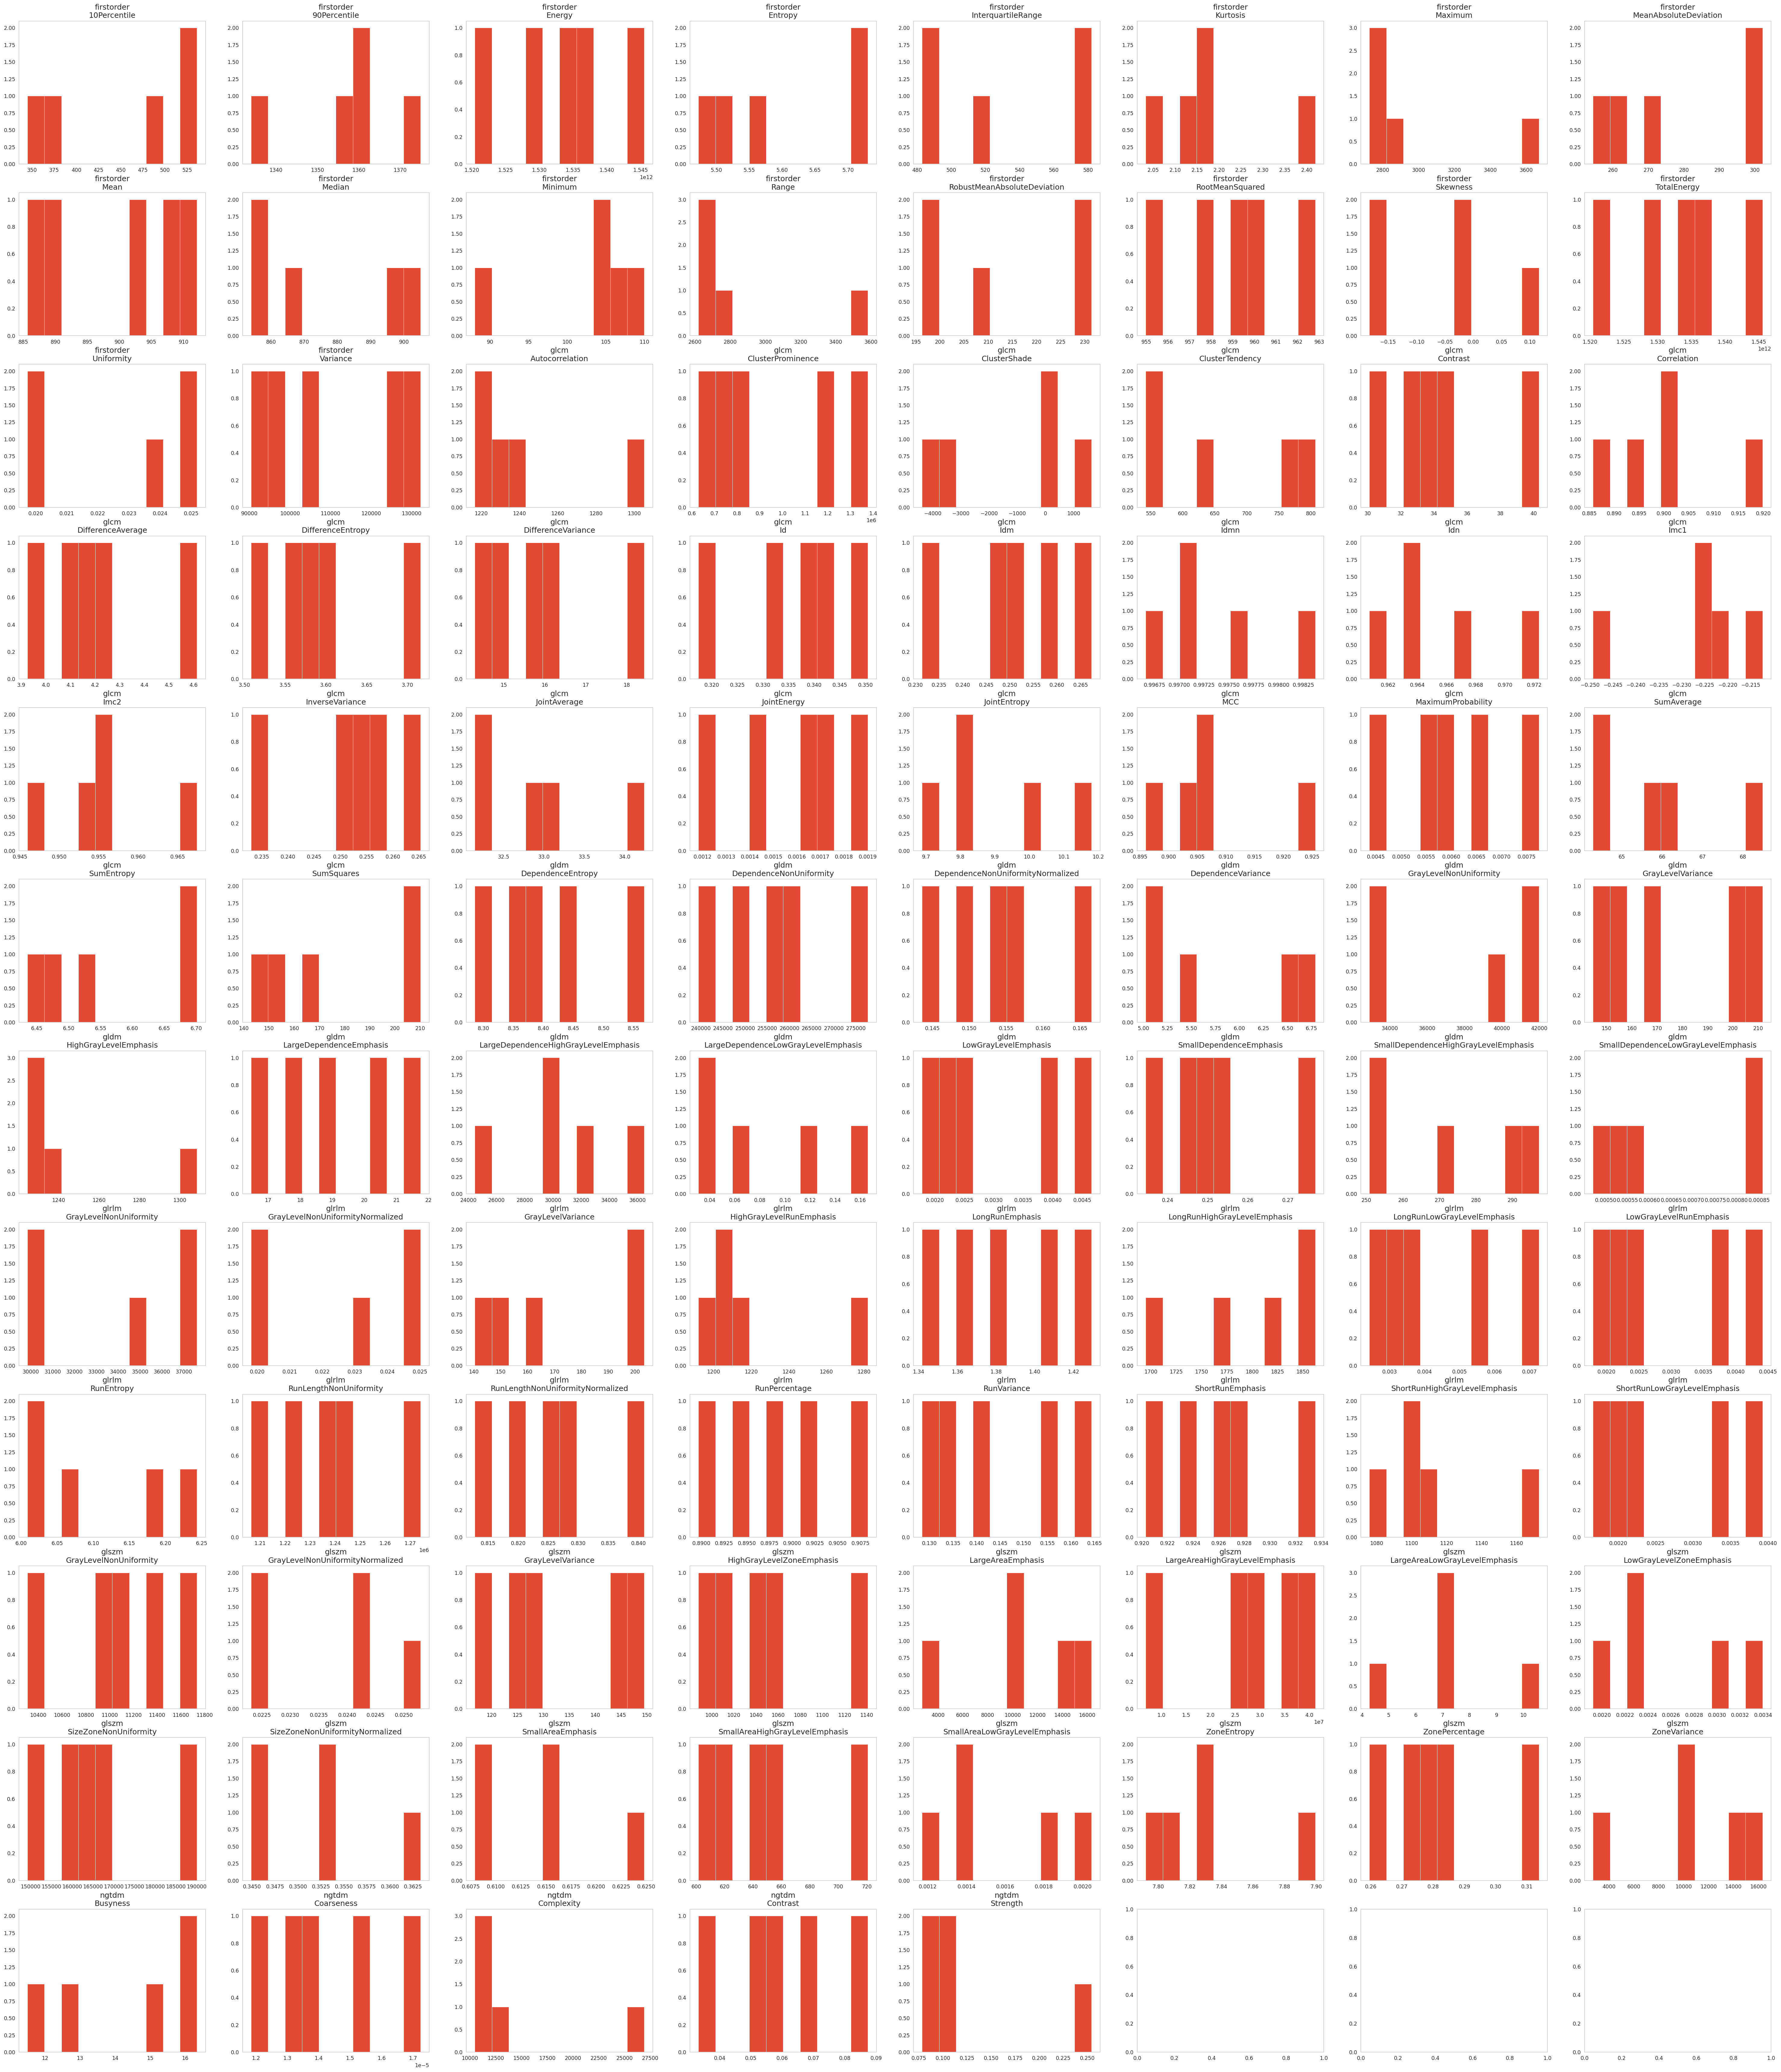

In [65]:
fig, m_axs = plt.subplots(12, 8, figsize=(60, 70))
for c_ax, c_var in zip(m_axs.flatten(), clean_col_names):
    c_ax.hist(clean_df[c_var].values, bins=10)  #生成直方图
    c_ax.set_title('\n'.join(c_var.split(' ')))
fig.savefig('all_metrics.png')  #保持图片